In [1]:
!pip install pandas_datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 4.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
import yfinance as yf
import datetime as dt
from pandas_datareader import data as pdr
yf.pdr_override

kospi = pdr.get_data_yahoo('^KS11','2002-09-28','2022-09-28')  ##yahoo finance 연동해서 코스피 20년치 데이터 가져오기
                    
kospi.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-09-30,648.840027,639.739990,645.280029,646.419983,505700.0,646.419983
2002-10-01,652.239990,637.770020,637.809998,652.130005,481500.0,652.130005
2002-10-02,666.969971,646.450012,666.770020,648.099976,755600.0,648.099976
2002-10-04,654.700012,638.000000,642.429993,650.919983,777600.0,650.919983
2002-10-07,644.320007,627.159973,644.320007,627.400024,605900.0,627.400024


In [3]:
kospi.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4941.000000,4941.000000,4941.000000,4941.000000,4.941000e+03,4941.000000
mean,1828.329208,1805.979769,1818.610236,1817.679117,4.686742e+05,1817.679117
std,595.512225,591.503938,593.792692,593.313502,2.576877e+05,593.313502
min,531.780029,512.299988,529.070007,515.239990,1.363000e+05,515.239990
25%,1425.130005,1407.260010,1416.949951,1418.380005,3.146000e+05,1418.380005
50%,1949.189941,1930.290039,1941.900024,1939.900024,3.985000e+05,1939.900024
75%,2108.979980,2088.189941,2100.100098,2099.489990,5.290000e+05,2099.489990
max,3316.080078,3295.439941,3305.459961,3305.209961,3.455500e+06,3305.209961


In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

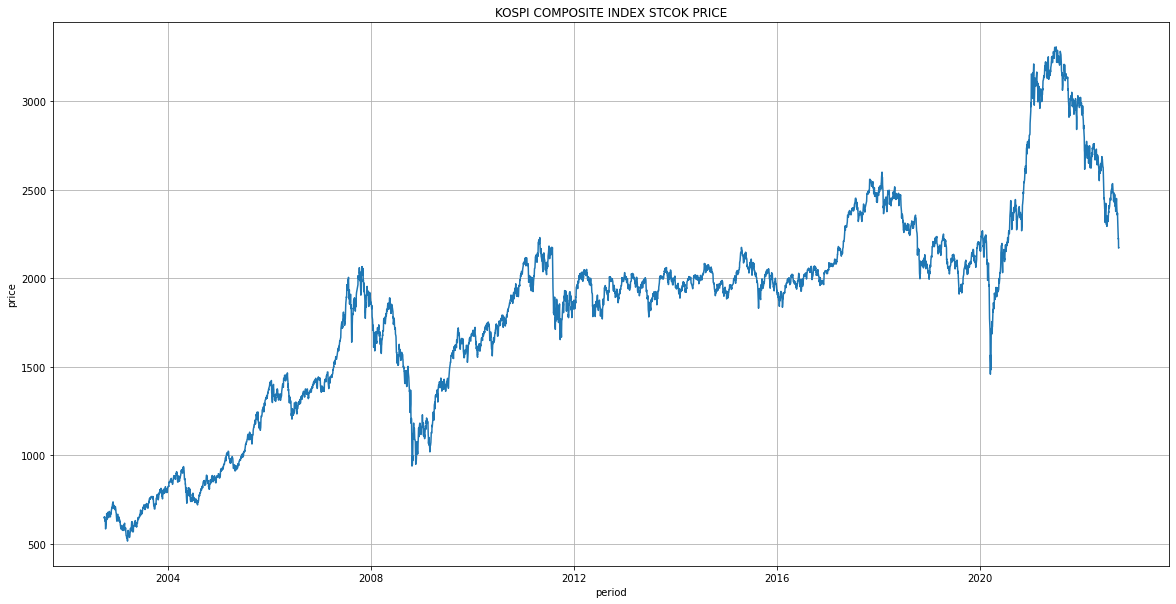

In [5]:
# 코스피 데이터 시각화
plt.figure(figsize = (20,10))
plt.title('KOSPI COMPOSITE INDEX STCOK PRICE')
plt.ylabel('price')
plt.xlabel('period')
plt.grid()

plt.plot(kospi['Adj Close'], label='Adj Close')

plt.show()

In [6]:
#이동평균선 컬럼 만들기
ma3 =  kospi['Adj Close'].rolling(window=3).mean()  # 3일선
ma7 = kospi['Adj Close'].rolling(window=7).mean()  # 7일선


kospi.insert(len(kospi.columns), "MA3", ma3)
kospi.insert(len(kospi.columns), "MA7", ma7)


kospi.head()


,High,Low,Open,Close,Volume,Adj Close,MA3,MA7
Date,,,,,,,,
2002-09-30,648.840027,639.739990,645.280029,646.419983,505700.0,646.419983,NaN,NaN
2002-10-01,652.239990,637.770020,637.809998,652.130005,481500.0,652.130005,NaN,NaN
2002-10-02,666.969971,646.450012,666.770020,648.099976,755600.0,648.099976,648.883321,NaN
2002-10-04,654.700012,638.000000,642.429993,650.919983,777600.0,650.919983,650.383321,NaN
2002-10-07,644.320007,627.159973,644.320007,627.400024,605900.0,627.400024,642.139994,NaN


In [7]:
kospi.isnull().sum()  ## 이동평균선 컬럼에 결측치존재 

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
MA3          2
MA7          6
dtype: int64

In [8]:
for col in kospi.columns:   ## 최소값이 0인 column이 있는지 체크

    if kospi[col].min() == 0:
        col_name = col
        print(col_name, type(col_name))

In [9]:
kospi.dropna(inplace=True)  # 결측치 제거

In [10]:
kospi.head()

,High,Low,Open,Close,Volume,Adj Close,MA3,MA7
Date,,,,,,,,
2002-10-09,637.010010,618.750000,637.010010,619.940002,568200.0,619.940002,627.393351,639.964286
2002-10-10,613.969971,584.039978,610.679993,584.039978,680100.0,584.039978,612.940002,631.052856
2002-10-11,604.469971,576.489990,602.880005,587.510010,690100.0,587.510010,597.163330,621.821429
2002-10-14,617.159973,603.799988,604.429993,614.270020,585700.0,614.270020,595.273336,616.988578
2002-10-15,634.440002,613.090027,620.760010,629.570007,793200.0,629.570007,610.450012,613.938581


In [11]:
kospi.shape  #  (4928, 9)

(4935, 8)

In [12]:
from sklearn.preprocessing import MinMaxScaler   
# 정규화
scaler = MinMaxScaler()
cols = ['High','Low','Open','Close','Volume','Adj Close', 'MA3', 'MA7']
df = scaler.fit_transform(kospi[cols])
df = pd.DataFrame(df, columns=cols)
print(df)

          High       Low      Open     Close    Volume  Adj Close       MA3  \
0     0.037794  0.038248  0.038878  0.037527  0.130122   0.037527  0.035815   
1     0.029519  0.025777  0.029394  0.024660  0.163835   0.024660  0.030596   
2     0.026107  0.023064  0.026585  0.025904  0.166847   0.025904  0.024898   
3     0.030665  0.032877  0.027143  0.035495  0.135394   0.035495  0.024215   
4     0.036871  0.036215  0.033025  0.040979  0.197909   0.040979  0.029696   
...        ...       ...       ...       ...       ...        ...       ...   
4930  0.647301  0.637198  0.649138  0.636122  0.093396   0.636122  0.648251   
4931  0.620989  0.611920  0.623734  0.611369  0.146150   0.611369  0.633050   
4932  0.608975  0.605647  0.610620  0.612415  0.105839   0.612415  0.619994   
4933  0.607614  0.589011  0.604051  0.592856  0.138407   0.592856  0.605463   
4934  0.602963  0.595672  0.601025  0.593444  0.112045   0.593444  0.599442   

           MA7  
0     0.038906  
1     0.035678  


In [13]:
# 학습 데이터 생성을 위한 작업
windowsize = 50
def build_data(feature, target, windowsize):
  
  feature_list = []
  target_list = []

  for i in range(len(feature)-windowsize):
    feature_list.append(feature[i:i+windowsize])
    target_list.append(target[i+windowsize])

  return np.array(feature_list), np.array(target_list)

In [14]:
feature = ['Adj Close', 'MA3', 'MA7']
target = ['Adj Close']

feature_df = pd.DataFrame(df, columns=feature)
target_df = pd.DataFrame(df, columns=target)

feature_np = feature_df.to_numpy() # 딥러닝 학습을위해 numpy형태로 변환
target_np = target_df.to_numpy()
print(feature_np)

[[0.03752729 0.0358155  0.03890646]
 [0.02465976 0.03059563 0.03567759]
 [0.02590351 0.02489785 0.03233276]
 ...
 [0.61241524 0.61999414 0.6423452 ]
 [0.59285586 0.60546257 0.63269843]
 [0.59344364 0.59944215 0.62250556]]


In [15]:
windowsize = 50   # 50개씩 보면서 학습하겠다
X, Y = build_data(feature_np, target_np, windowsize)

X.shape, Y.shape   ## X.shape = (batch size, time steps, input dimension)

((4885, 50, 3), (4885, 1))

In [16]:
# 훈련, 테스트 데이터 80:20 나누기 (최근4년간의 주가를 테스트 데이터로 사용)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0, shuffle=False)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3908, 50, 3) (3908, 1)
(977, 50, 3) (977, 1)


In [17]:
X_test

array([[[0.63791009, 0.63471472, 0.63407579],
        [0.63737963, 0.63718018, 0.63465655],
        [0.63800687, 0.63792656, 0.63497075],
        ...,
        [0.61411776, 0.62181918, 0.63603756],
        [0.57865495, 0.60522421, 0.62499166],
        [0.59018919, 0.59415127, 0.61582835]],

       [[0.63737963, 0.63718018, 0.63465655],
        [0.63800687, 0.63792656, 0.63497075],
        [0.64223992, 0.63938081, 0.63692526],
        ...,
        [0.57865495, 0.60522421, 0.62499166],
        [0.59018919, 0.59415127, 0.61582835],
        [0.58419271, 0.5841004 , 0.60731619]],

       [[0.63800687, 0.63792656, 0.63497075],
        [0.64223992, 0.63938081, 0.63692526],
        [0.62902468, 0.63657465, 0.63640765],
        ...,
        [0.59018919, 0.59415127, 0.61582835],
        [0.58419271, 0.5841004 , 0.60731619],
        [0.58419271, 0.58596036, 0.60061982]],

       ...,

       [[0.64770592, 0.64815081, 0.65000693],
        [0.65080987, 0.64974228, 0.65202407],
        [0.66667743, 0

In [18]:
X_train[0].shape

(50, 3)

In [43]:
# LSTM 모델 만들기
model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=X_train[0].shape))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                17408     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19,521
Trainable params: 19,521
Non-trainable params: 0
_________________________________________________________________


In [45]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='mse', optimizer='adam',metrics='mae')
#earlystop = EarlyStopping(monitor='val_loss', patience=10)
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)

Epoch 1/50
489/489 [==============================] - 5s 7ms/step - loss: 2.1467e-04 - mae: 0.0108 - val_loss: 3.5748e-04 - val_mae: 0.0142
Epoch 2/50
489/489 [==============================] - 3s 6ms/step - loss: 1.4927e-04 - mae: 0.0092 - val_loss: 2.7467e-04 - val_mae: 0.0125
Epoch 3/50
489/489 [==============================] - 3s 6ms/step - loss: 1.2595e-04 - mae: 0.0085 - val_loss: 2.1833e-04 - val_mae: 0.0114
Epoch 4/50
489/489 [==============================] - 3s 6ms/step - loss: 1.0035e-04 - mae: 0.0075 - val_loss: 2.5522e-04 - val_mae: 0.0122
Epoch 5/50
489/489 [==============================] - 3s 6ms/step - loss: 8.0831e-05 - mae: 0.0067 - val_loss: 2.1397e-04 - val_mae: 0.0113
Epoch 6/50
489/489 [==============================] - 3s 6ms/step - loss: 8.7978e-05 - mae: 0.0070 - val_loss: 2.0094e-04 - val_mae: 0.0107
Epoch 7/50
489/489 [==============================] - 4s 8ms/step - loss: 7.5078e-05 - mae: 0.0065 - val_loss: 4.3687e-04 - val_mae: 0.0186
Epoch 8/50
489/489 [

In [46]:
result = model.evaluate(X_test,y_test)

31/31 [==============================] - 0s 4ms/step - loss: 1.4070e-04 - mae: 0.0089


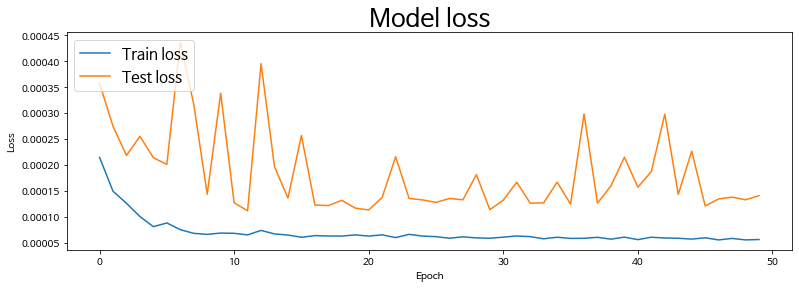

In [47]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize = (13,4))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss',fontsize = 25)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper left',fontsize=15)
plt.show();

In [23]:
#matplotlib 패키지 한글 깨짐 처리
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
^C
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
^C


In [24]:
plt.rc('font', family='NanumBarunGothic')

In [48]:
pred = model.predict(X_test)

In [49]:
pred.shape

(977, 1)

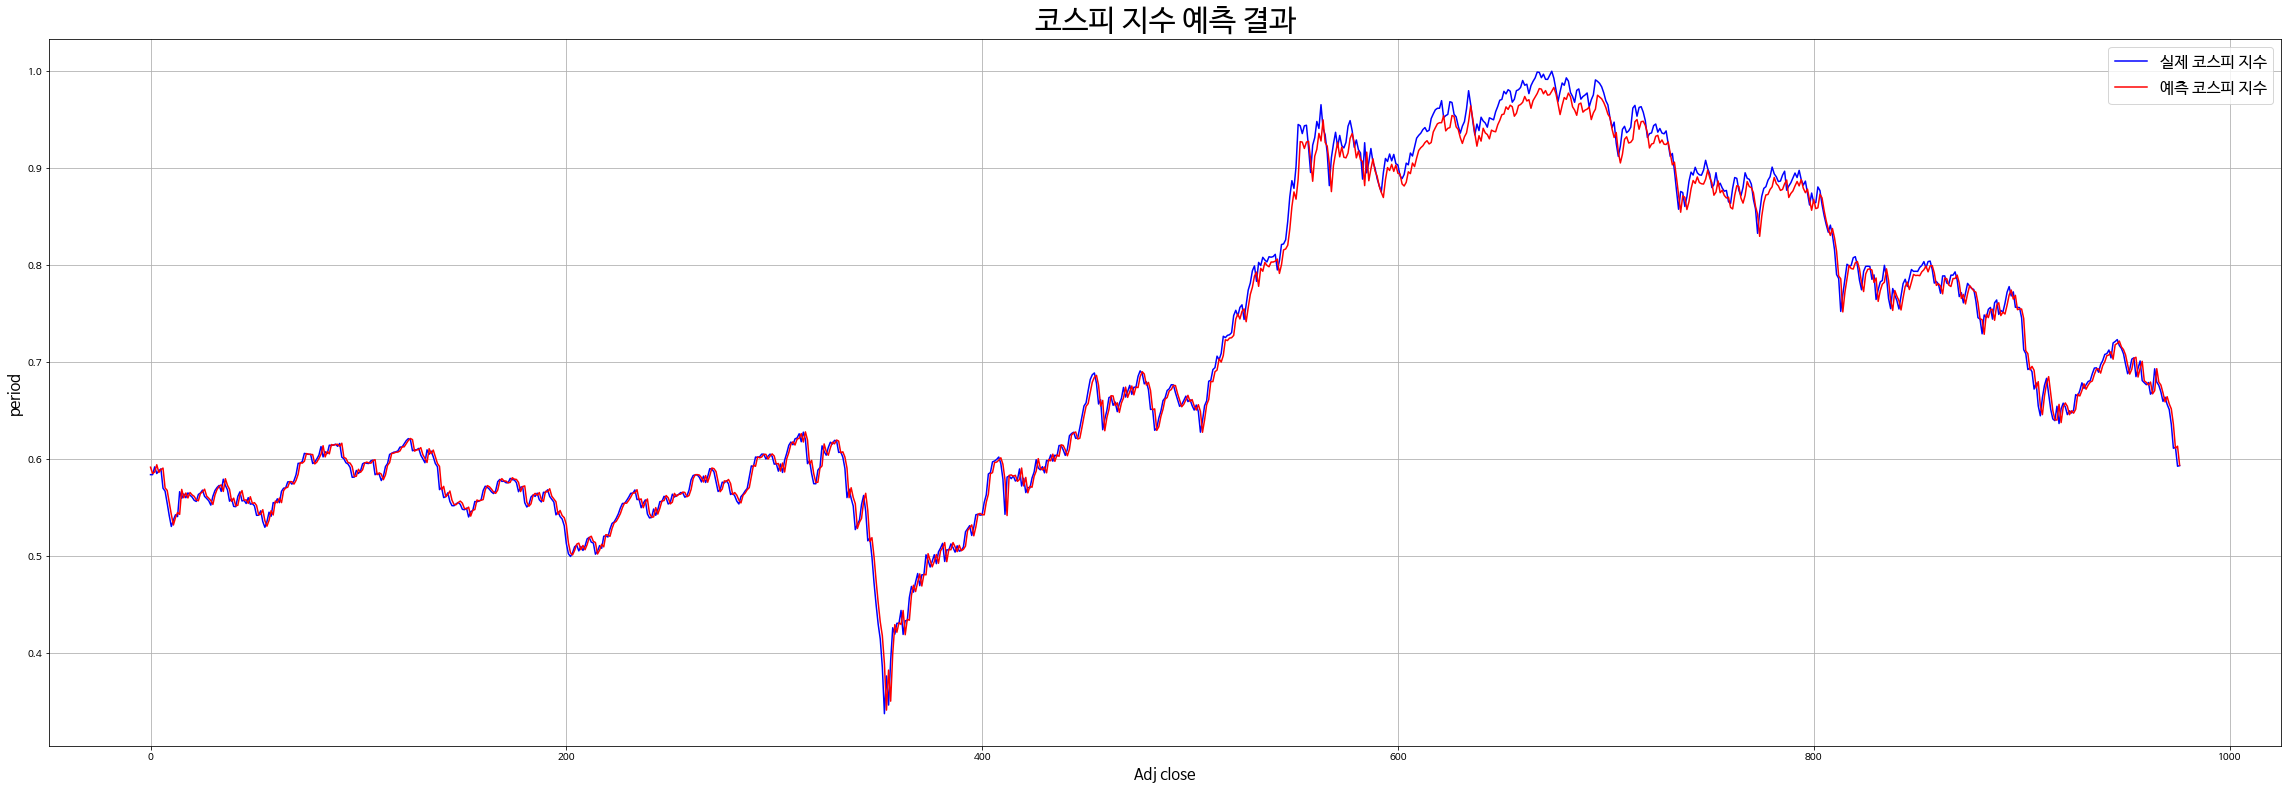

In [50]:
plt.figure(figsize = (40,13))

plt.title('코스피 지수 예측 결과',fontsize = 30)
plt.xlabel('Adj close',fontsize = 15)
plt.ylabel('period',fontsize=15)
plt.plot(y_test,'b',label = '실제 코스피 지수')
plt.plot(pred,'r',label = '예측 코스피 지수')
plt.grid()
plt.legend(loc='best',fontsize=16)
plt.show()

In [51]:
#하이퍼파라미터 튜닝 1.RandomSearchCV 를 통해 최적의 배치사이즈 찾기
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model():  #
    model = Sequential()
    model.add(LSTM(64, activation='tanh', input_shape=X_train[0].shape))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1 = 0.89), metrics=['accuracy'])
    
    return model

In [52]:
model = KerasClassifier(build_fn=create_model, verbose=0)  ## KerasClassifier 로 Wrapping

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [53]:
batch_size = [8, 16, 32, 64]
param_grid = dict(batch_size=batch_size)

rand = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=1)
rand_result = rand.fit(X, Y)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [54]:
#최적의 결과를 낸 배치사이즈 확인
print(f"Best: {rand_result.best_score_} using {rand_result.best_params_}")

means = rand_result.cv_results_['mean_test_score']
stds = rand_result.cv_results_['std_test_score']
params = rand_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.0014329580590128899 using {'batch_size': 8}
Means: 0.0014329580590128899, Stdev: 0.0028659161180257797 with: {'batch_size': 8}
Means: 0.0014329580590128899, Stdev: 0.0028659161180257797 with: {'batch_size': 16}
Means: 0.0014329580590128899, Stdev: 0.0028659161180257797 with: {'batch_size': 32}
Means: 0.0014329580590128899, Stdev: 0.0028659161180257797 with: {'batch_size': 64}


In [55]:
#Keras Tuner 사용해서 하이퍼파라미터 튜닝(Dense layer, learning rate)
from tensorflow import keras
!pip install -U keras-tuner
import kerastuner as kt
import IPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
def model_builder(hp):
  model = Sequential()
    
  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
  model.add(LSTM(units=hp_units, activation='tanh', input_shape=X_train[0].shape))
  model.add(Dense(units=hp_units, activation = 'sigmoid'))
  model.add(Dense(1, activation='linear'))

  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 5e-4, 1e-4]) 
  model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate), metrics=['mae'])

  hp_units2 = hp.Float('dropout', 0, 0.5, step=0.1)
    
  return model

In [61]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_loss', 
                     max_epochs = 50,
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'LSTM_kospi')

In [62]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):  #하이퍼파라미터 탐색을 실행하기 전에 학습이 끝날 때마다 이전 출력이 지워지도록 콜백 함수를 정의
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [63]:
tuner.search(X_train, y_train, epochs = 3, validation_data = (X_test, y_test), callbacks = [ClearTrainingOutput()])

best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
하이퍼 파라미터 검색이 완료되었습니다. 
최적화된 첫 번째 Dense 노드 수는 {best_hps.get('units')} 입니다.
최적의 학습 속도는 {best_hps.get('learning_rate')} 입니다.
최적의 dropout은 {best_hps.get('dropout')}입니다.
""")

Trial 128 Complete [00h 01m 24s]
val_loss: 0.00014646015188191086

Best val_loss So Far: 0.00010697653488023207
Total elapsed time: 00h 14m 51s

하이퍼 파라미터 검색이 완료되었습니다. 
최적화된 첫 번째 Dense 노드 수는 448 입니다.
최적의 학습 속도는 0.001 입니다.
최적의 dropout은 0.5입니다.



In [64]:
# 최고 성능을 보이는 하이퍼파라미터 조합으로 다시 학습
model = tuner.hypermodel.build(best_hps)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 448)               809984    
                                                                 
 dense_2 (Dense)             (None, 448)               201152    
                                                                 
 dense_3 (Dense)             (None, 1)                 449       
                                                                 
Total params: 1,011,585
Trainable params: 1,011,585
Non-trainable params: 0
_________________________________________________________________


In [65]:
hist = model.fit(X_train, y_train, batch_size=8, epochs = 50, validation_data = (X_test, y_test))  

Epoch 1/50
489/489 [==============================] - 5s 8ms/step - loss: 0.0020 - mae: 0.0213 - val_loss: 3.6880e-04 - val_mae: 0.0152
Epoch 2/50
489/489 [==============================] - 4s 8ms/step - loss: 2.7439e-04 - mae: 0.0129 - val_loss: 3.5245e-04 - val_mae: 0.0138
Epoch 3/50
489/489 [==============================] - 4s 7ms/step - loss: 2.6941e-04 - mae: 0.0129 - val_loss: 4.6697e-04 - val_mae: 0.0175
Epoch 4/50
489/489 [==============================] - 4s 7ms/step - loss: 2.3837e-04 - mae: 0.0123 - val_loss: 7.2094e-04 - val_mae: 0.0244
Epoch 5/50
489/489 [==============================] - 4s 7ms/step - loss: 2.6807e-04 - mae: 0.0129 - val_loss: 1.6416e-04 - val_mae: 0.0095
Epoch 6/50
489/489 [==============================] - 4s 7ms/step - loss: 1.7870e-04 - mae: 0.0105 - val_loss: 4.0293e-04 - val_mae: 0.0173
Epoch 7/50
489/489 [==============================] - 4s 8ms/step - loss: 2.1730e-04 - mae: 0.0116 - val_loss: 3.6565e-04 - val_mae: 0.0158
Epoch 8/50
489/489 [====

In [66]:
result = model.evaluate(X_test,y_test)

31/31 [==============================] - 0s 6ms/step - loss: 7.9320e-04 - mae: 0.0260


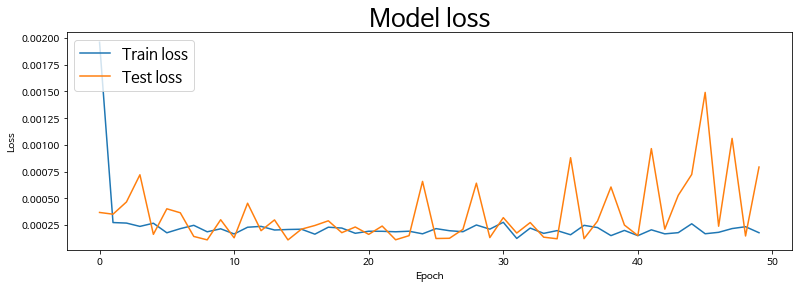

In [67]:
plt.figure(figsize = (13,4))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss',fontsize = 25)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper left',fontsize=15)
plt.show();

In [68]:
pred = model.predict(X_test)

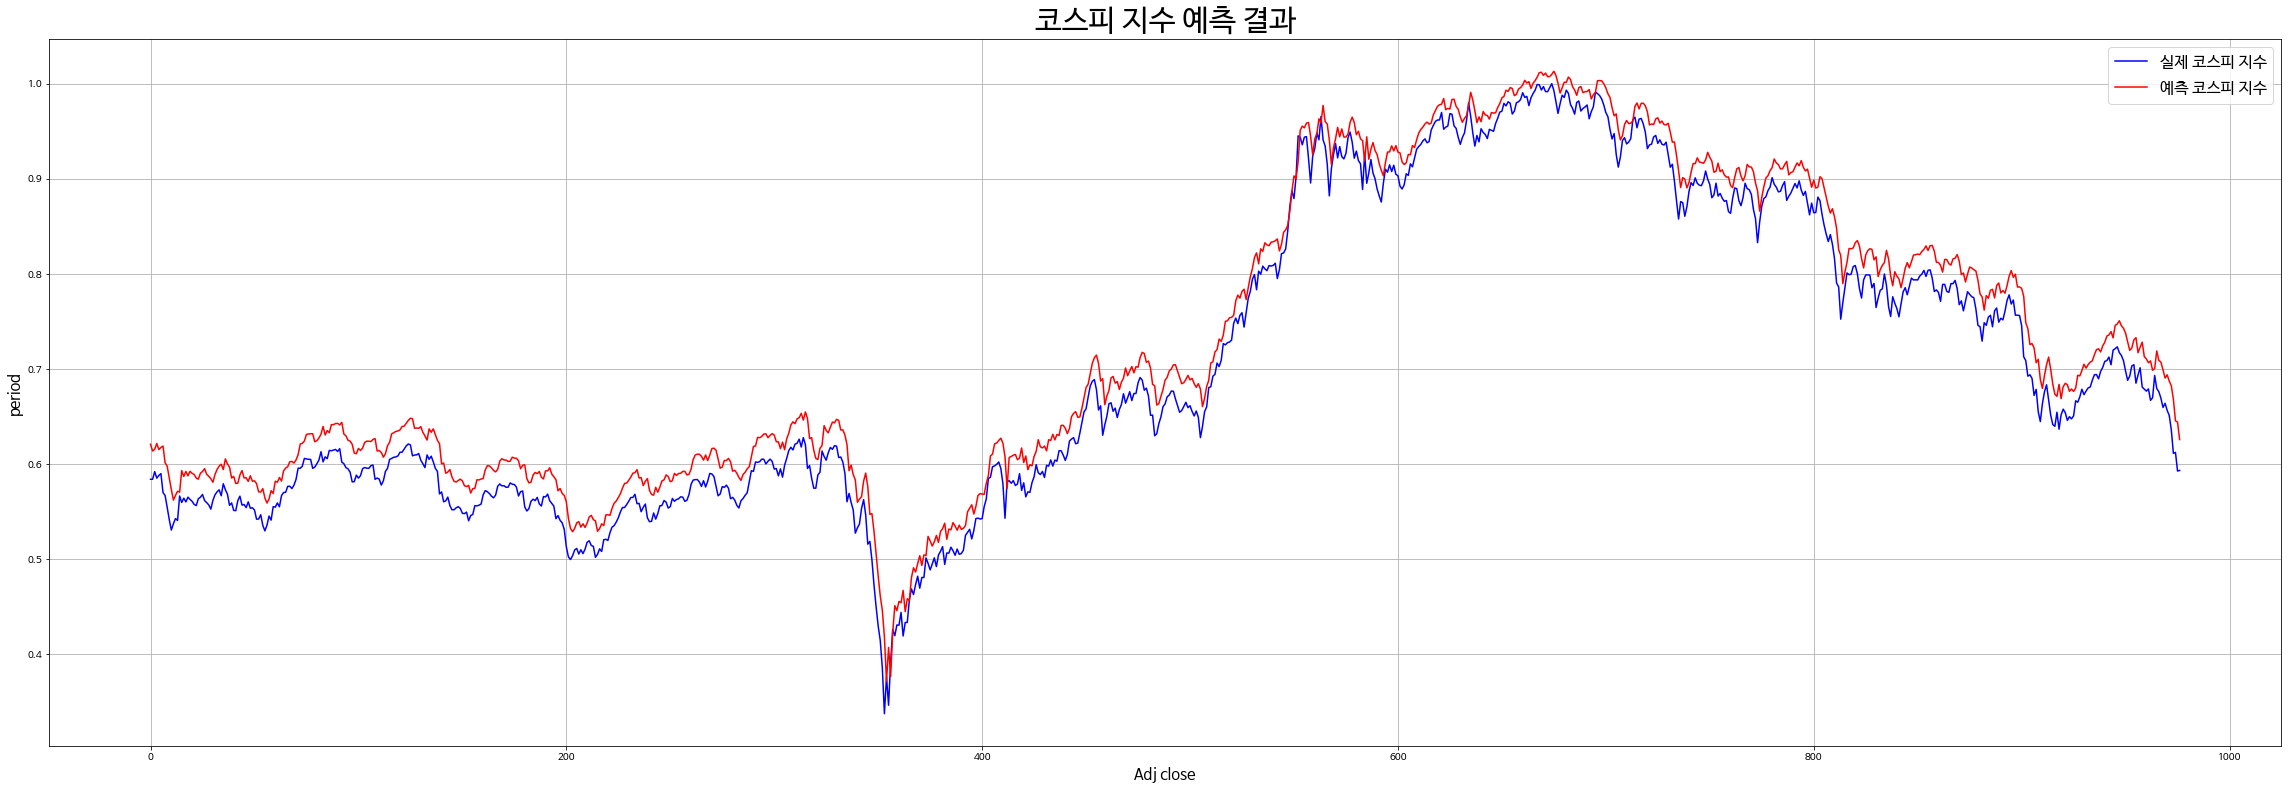

In [69]:
plt.figure(figsize = (40,13))

plt.title('코스피 지수 예측 결과',fontsize = 30)
plt.xlabel('Adj close',fontsize = 15)
plt.ylabel('period',fontsize=15)
plt.plot(y_test,'b',label = '실제 코스피 지수')
plt.plot(pred,'r',label = '예측 코스피 지수')
plt.grid()
plt.legend(loc='best',fontsize=16)
plt.show()
